In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()
       
        m2      = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm2, ym2  = m2(LON, LAT)
        im2     = m2.plot(xm2,ym2,'.', color='k',linewidth=2.)

        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

In [3]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [4]:
# Load variables
mean_Salt_surf = pickle_load('mean_Salt_surf', '/data/ebent')
mean_Salt_30 = pickle_load('mean_Salt_30', '/data/ebent')
mean_Salt_100 = pickle_load('mean_Salt_100', '/data/ebent')
mean_Salt_200 = pickle_load('mean_Salt_200', '/data/ebent')
mean_Salt_500 = pickle_load('mean_Salt_500', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Salt_surf.npy')
('loaded from : ', '/data/ebent/mean_Salt_30.npy')
('loaded from : ', '/data/ebent/mean_Salt_100.npy')
('loaded from : ', '/data/ebent/mean_Salt_200.npy')
('loaded from : ', '/data/ebent/mean_Salt_500.npy')


In [5]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Salt.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Salt.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Salt.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Salt.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Salt.nc','r')

In [6]:
# Lambert
lon_min = 1950
lon_max = 2520
lat_min = 0
lat_max = 541

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)
depth = file1.variables['depth'][:]

In [7]:
# Mercator
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)
depth = file1.variables['depth'][:]

In [27]:
# Mercator bigger
lon_min = 1440
lon_max = 3240
lat_min = 0
lat_max = 1023

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)
depth = file1.variables['depth'][:]

In [8]:
run /home/ebent/Octopus/Octopus-master/scripts/p_xy.py

data has 181 records
glued data : 100PARTI_0003_0001.XYZ.0000000001.0000001801.data
location of data : /data/ebent/Octopus/output/100parti_3


In [9]:
LON = lon
LAT = lat

# Plots

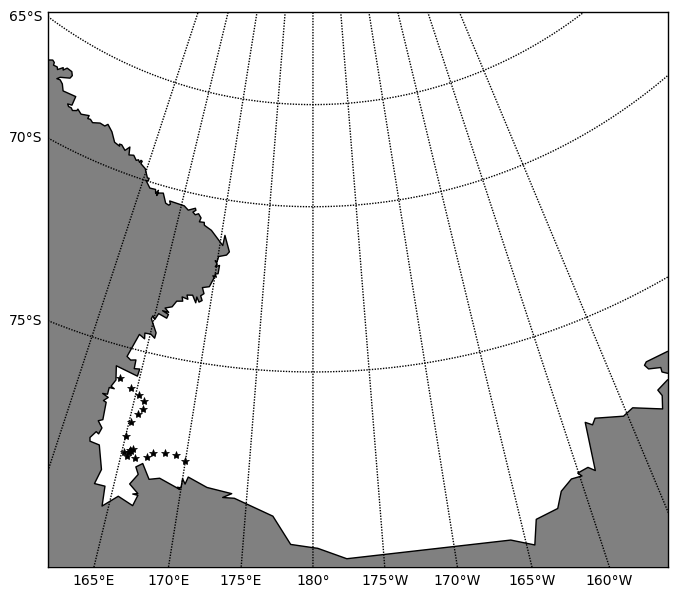

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm, ym  = m(LON, LAT)
#im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

#cbar = m.colorbar(im,pad='10%')
#cbar.set_label(title_colorbar, fontsize =16)

m.fillcontinents(color='0.5', lake_color='0.5')
m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
m.drawcoastlines()

im2     = m.plot(xm,ym,'*', color='k',linewidth=2.)

#plt.title('title', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

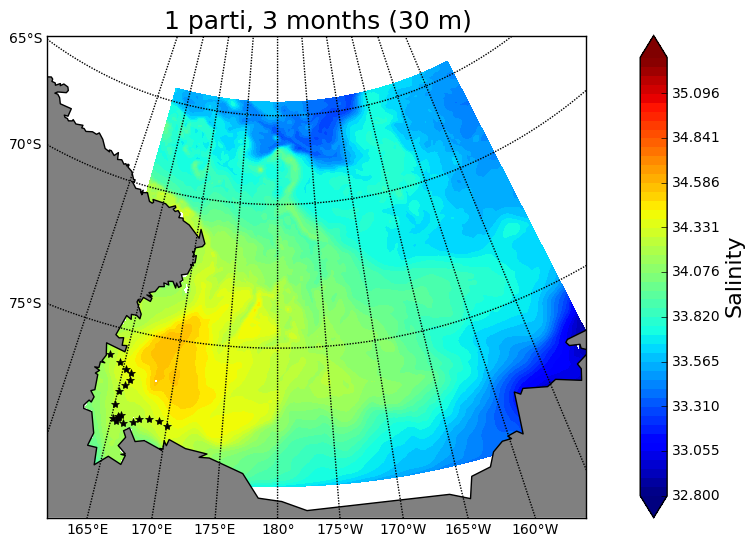

In [13]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 3 months (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

# TEST_0001

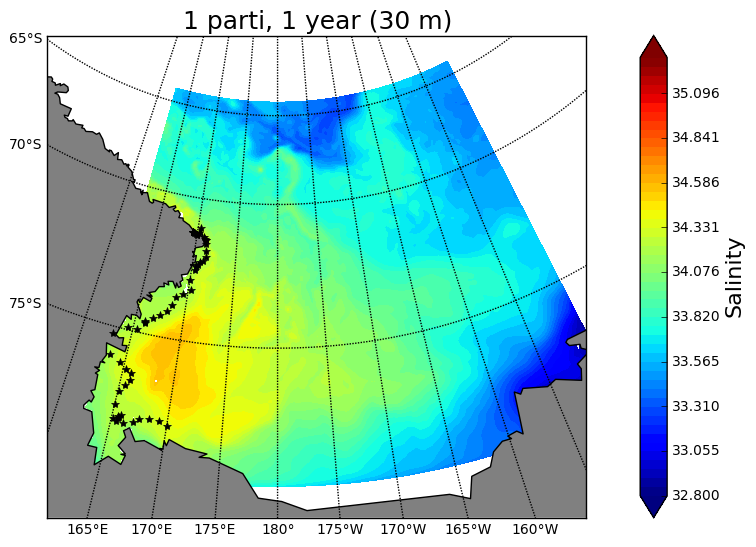

In [19]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 1 year (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

# TEST_0002

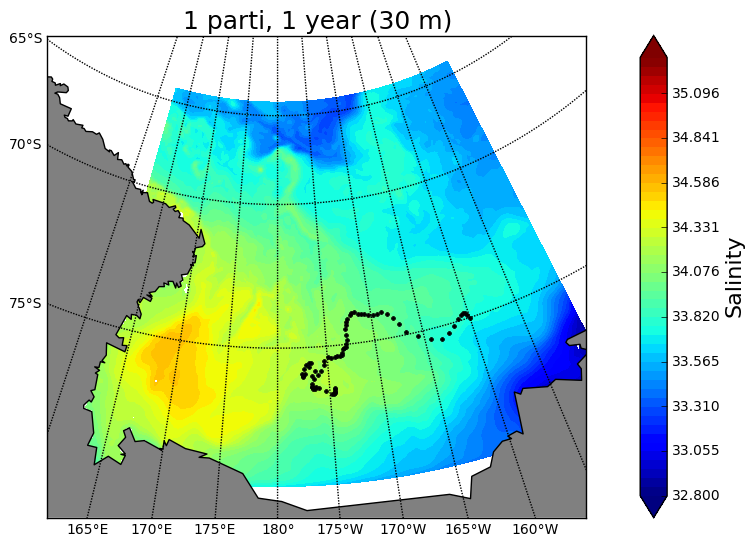

In [38]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 1 year (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

# TEST_0003

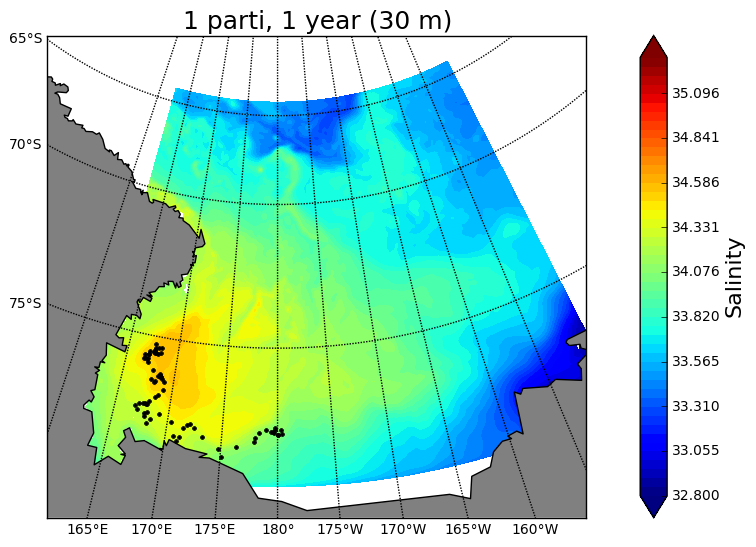

In [49]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 1 year (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

# TEST_0004

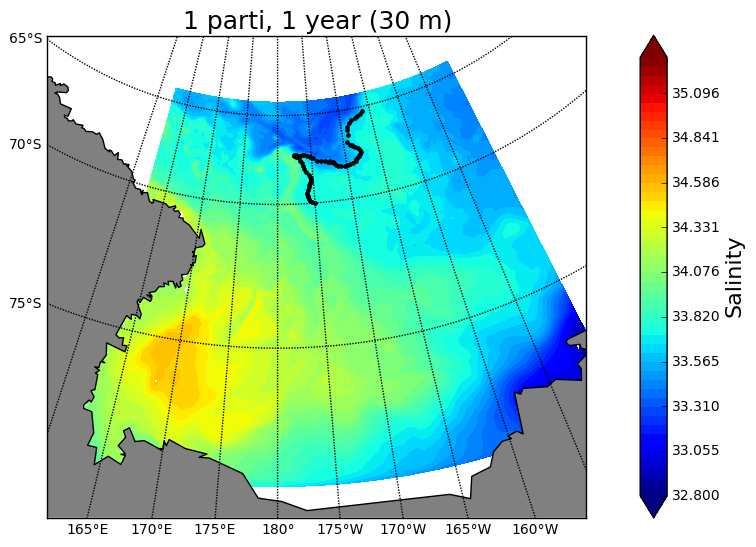

In [55]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 1 year (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

# TEST_0005

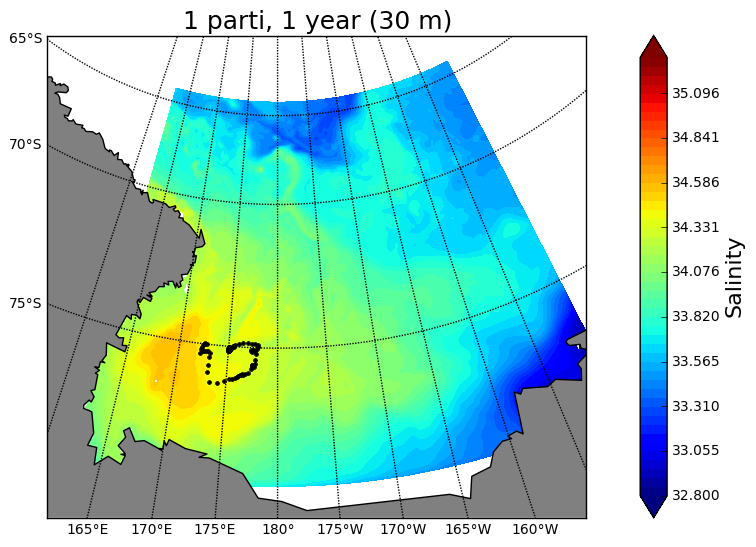

In [58]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 1 year (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

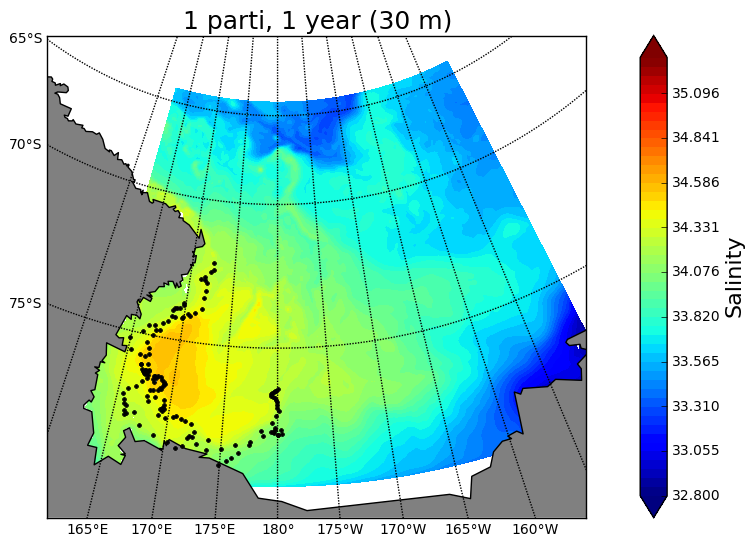

In [78]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, '1 parti, 1 year (30 m)', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

# First 2 parti run - initial pos [180, -77] and [180, -76]

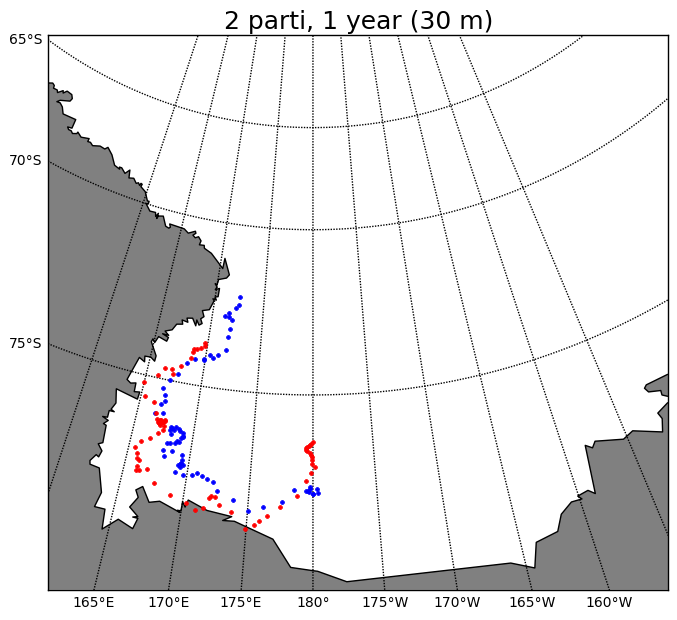

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm, ym  = m(LON[:,0], LAT[:,0])

m2       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm2, ym2  = m2(LON[:,1], LAT[:,1])
#im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

#cbar = m.colorbar(im,pad='10%')
#cbar.set_label(title_colorbar, fontsize =16)

m.fillcontinents(color='0.5', lake_color='0.5')
m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
m.drawcoastlines()

im     = m.plot(xm,ym,'.', color='b',linewidth=2.)
im2     = m.plot(xm2,ym2,'.', color='r',linewidth=2.)

plt.title('2 parti, 1 year (30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

# Remake of TEST_0001 - initial pos [180, -77] and [180, -76]

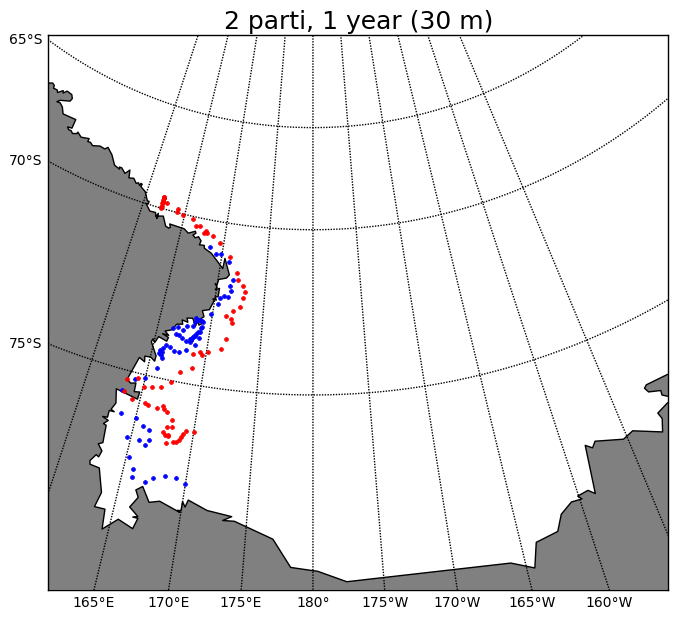

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm, ym  = m(LON[:,0], LAT[:,0])

m2       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm2, ym2  = m2(LON[:,1], LAT[:,1])
#im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

#cbar = m.colorbar(im,pad='10%')
#cbar.set_label(title_colorbar, fontsize =16)

m.fillcontinents(color='0.5', lake_color='0.5')
m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
m.drawcoastlines()

im     = m.plot(xm,ym,'.', color='b',linewidth=2.)
im2     = m.plot(xm2,ym2,'.', color='r',linewidth=2.)

plt.title('2 parti, 1 year (30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

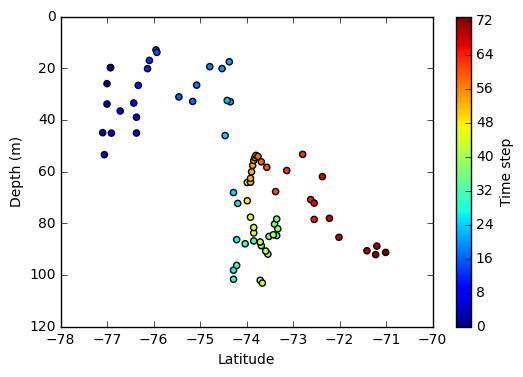

In [108]:
t = np.arange(74)
plt.scatter(LAT[:,0],dep[:,0], c=t)
plt.gca().invert_yaxis()
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
cb = plt.colorbar()
cb.set_label('Time step')

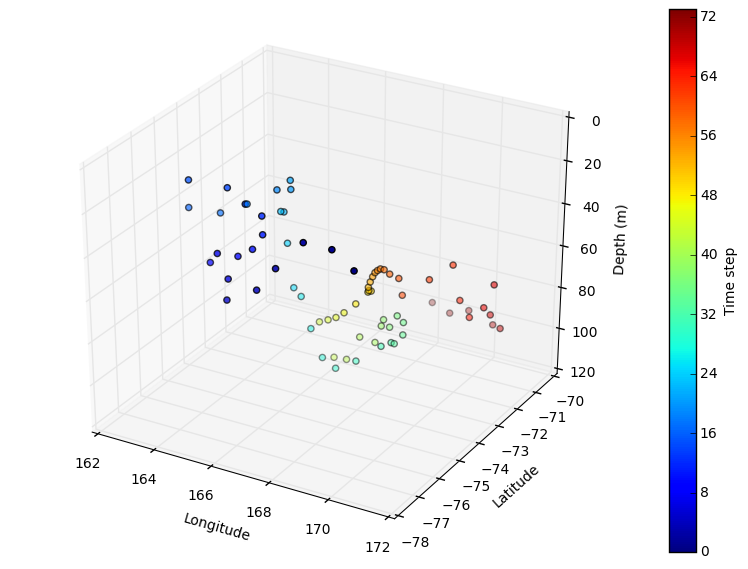

In [129]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


t = np.arange(74)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(LON[:,0], LAT[:,0], dep[:,0], c=t)#, marker='.')
plt.gca().invert_zaxis()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

cb = fig.colorbar(p)
cb.set_label('Time step')


#ax.set_xlabel('Lon')
#ax.set_ylabel('Lat')
ax.set_zlabel('Depth (m)')

# Test to see if particles go on land

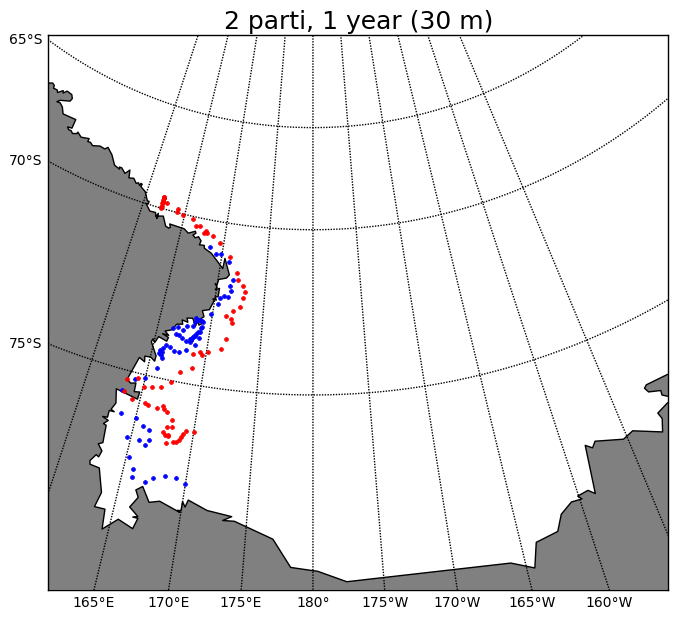

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm, ym  = m(LON[:,0], LAT[:,0])

m2       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm2, ym2  = m2(LON[:,1], LAT[:,1])
#im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

#cbar = m.colorbar(im,pad='10%')
#cbar.set_label(title_colorbar, fontsize =16)

m.fillcontinents(color='0.5', lake_color='0.5')
m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
m.drawcoastlines()

im     = m.plot(xm,ym,'.', color='b',linewidth=2.)
im2     = m.plot(xm2,ym2,'.', color='r',linewidth=2.)

plt.title('2 parti, 1 year (30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

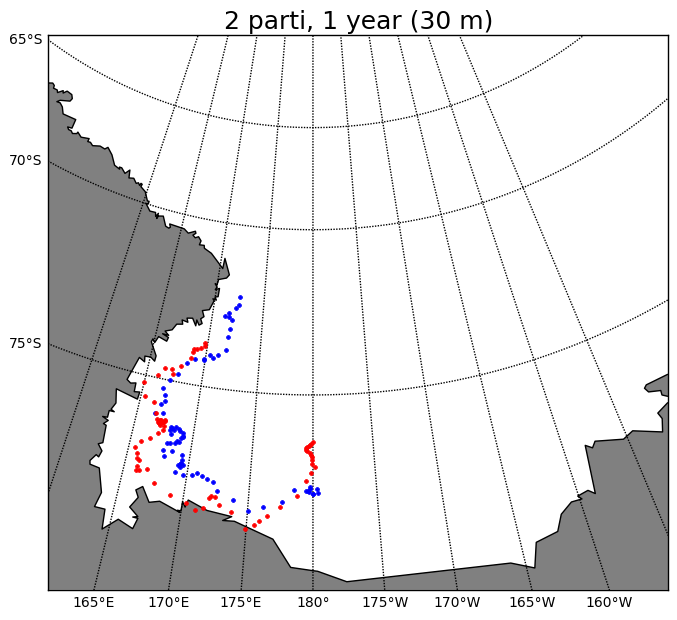

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm, ym  = m(LON[:,0], LAT[:,0])

m2       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
          rsphere=(6378137.00,6356752.3142),\
          resolution='l',area_thresh=1000.,projection='lcc',\
          lat_1=65.,lon_0=180.)
xm2, ym2  = m2(LON[:,1], LAT[:,1])
#im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

#cbar = m.colorbar(im,pad='10%')
#cbar.set_label(title_colorbar, fontsize =16)

m.fillcontinents(color='0.5', lake_color='0.5')
m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
m.drawcoastlines()

im     = m.plot(xm,ym,'.', color='b',linewidth=2.)
im2     = m.plot(xm2,ym2,'.', color='r',linewidth=2.)

plt.title('2 parti, 1 year (30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

In [14]:
# This is hFacC for the ROSS SEA (domain of lambert proj)

pth_data_in='/data/soccom/GRID_12/BIN4EMMA/'
nz,ny,nx=104,542,571

fn_hFacC=pth_data_in+'hFacC.data'
hfac=np.fromfile(fn_hFacC,'>f4')
hfac = np.reshape(hfac,[nz,ny,nx])
#hfac = hfac[:,:,:] #select the right depth

In [15]:
hfac.shape

(104, 542, 571)

In [32]:
# Select a specific region
lon_min = 1950
lon_max = 2520
lat_min = 0
lat_max = 541

lat_h = file1.variables['lat'][lat_min:lat_max]
lon_h = file1.variables['lon'][lon_min:lon_max]
Lon_h, Lat_h = np.meshgrid(lon_h,lat_h)

### For before the last figure

In [113]:
hfac = hfac[map(int,z[:,1]),map(int,y[:,1]),map(int,x[:,1])]

In [123]:
hfac = hfac[map(int,z[:,0]),map(int,y[:,0]),map(int,x[:,0])]

In [124]:
hfac

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

### For last figure

In [130]:
hfac = hfac[map(int,z[:,1]),map(int,y[:,1]),map(int,x[:,1])]

In [135]:
hfac = hfac[map(int,z[:,0]),map(int,y[:,0]),map(int,x[:,0])]

In [136]:
hfac

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

# 100 particles

In [17]:
# Mercator salinity
mean_Salt_30 = pickle_load('mean_Salt_30_2', '/data/ebent')

# Mercator for salinity
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

('loaded from : ', '/data/ebent/mean_Salt_30_2.npy')


In [21]:
# Lambert salinity
mean_Salt_30 = pickle_load('mean_Salt_30', '/data/ebent')

# Lambert for salinity
lon_min = 1950
lon_max = 2520
lat_min = 0
lat_max = 541

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

('loaded from : ', '/data/ebent/mean_Salt_30.npy')


In [35]:
for i in range(len(lon)):
    print i , lon[i]

0 0.0416666679084
1 0.125
2 0.208333328366
3 0.291666656733
4 0.375
5 0.458333343267
6 0.541666686535
7 0.625
8 0.708333313465
9 0.791666686535
10 0.875
11 0.958333313465
12 1.04166662693
13 1.125
14 1.20833337307
15 1.29166662693
16 1.375
17 1.45833337307
18 1.54166662693
19 1.625
20 1.70833337307
21 1.79166662693
22 1.875
23 1.95833337307
24 2.04166674614
25 2.125
26 2.20833325386
27 2.29166674614
28 2.375
29 2.45833325386
30 2.54166674614
31 2.625
32 2.70833325386
33 2.79166674614
34 2.875
35 2.95833325386
36 3.04166674614
37 3.125
38 3.20833325386
39 3.29166674614
40 3.375
41 3.45833325386
42 3.54166674614
43 3.625
44 3.70833325386
45 3.79166674614
46 3.875
47 3.95833325386
48 4.04166650772
49 4.125
50 4.20833349228
51 4.29166650772
52 4.375
53 4.45833349228
54 4.54166650772
55 4.625
56 4.70833349228
57 4.79166650772
58 4.875
59 4.95833349228
60 5.04166650772
61 5.125
62 5.20833349228
63 5.29166650772
64 5.375
65 5.45833349228
66 5.54166650772
67 5.625
68 5.70833349228
69 5.7916665

In [14]:
# This is hFacC for the WHOLE WORLD

file = h5py.File(load_path3 + 'grid.mat','r')

hFacC = file.get('hFacC')
hFacC = np.array(hFacC)
Xf = file.get('XC')
Xf = np.array(Xf)
Yf = file.get('YC')
Yf = np.array(Yf)
hFacC = np.ma.masked_array(hFacC)
hFacC = np.ma.masked_where(hFacC==1, hFacC)

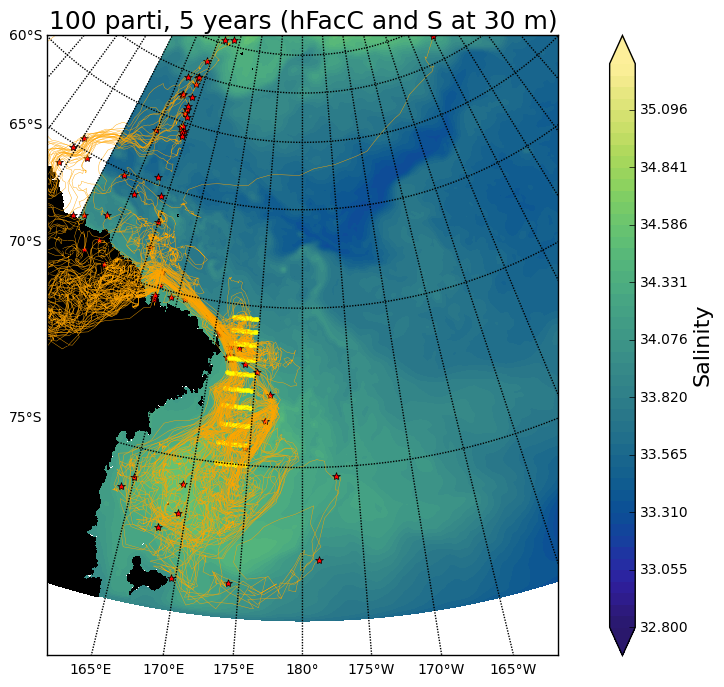

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
#m       = Basemap(projection='ortho', lat_0=-90, lon_0=0)#, resolution="f")
#m       = Basemap(projection='merc',llcrnrlat=-80.,urcrnrlat=-30.,llcrnrlon=150.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)

# Plot all the traj
for i in range(100): 
    xm, ym  = m(LON[:,i], LAT[:,i])
    im      = m.plot(xm, ym, '-', color='orange',linewidth=0.3)
    xm, ym  = m(LON[0,i], LAT[0,i])
    im      = m.plot(xm, ym, '.', color='yellow',linewidth=2.)
    xm, ym  = m(LON[-1,i], LAT[-1,i])
    im      = m.plot(xm, ym, '*', color='r',linewidth=3.)
    
# Plot the salinity
xm, ym  = m(Lon, Lat)
im      = m.contourf(xm, ym, mean_Salt_30, levels=np.linspace(32.8,35.3,50), extend='both', cmap=cmocean.cm.haline)
cbar    = m.colorbar(im,pad='10%')
cbar.set_label('Salinity', fontsize =16)

# Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
xm, ym  = m(Xf, Yf)
im      = m.contourf(xm, ym, hFacC[9,...], levels=np.linspace(0,1,2), extend='both', cmap='Greys_r')


m.drawparallels(np.arange(-80.,-40.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(120.,260.,5), labels=[0, 0, 0, 1])
plt.title('100 parti, 5 years (hFacC and S at 30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

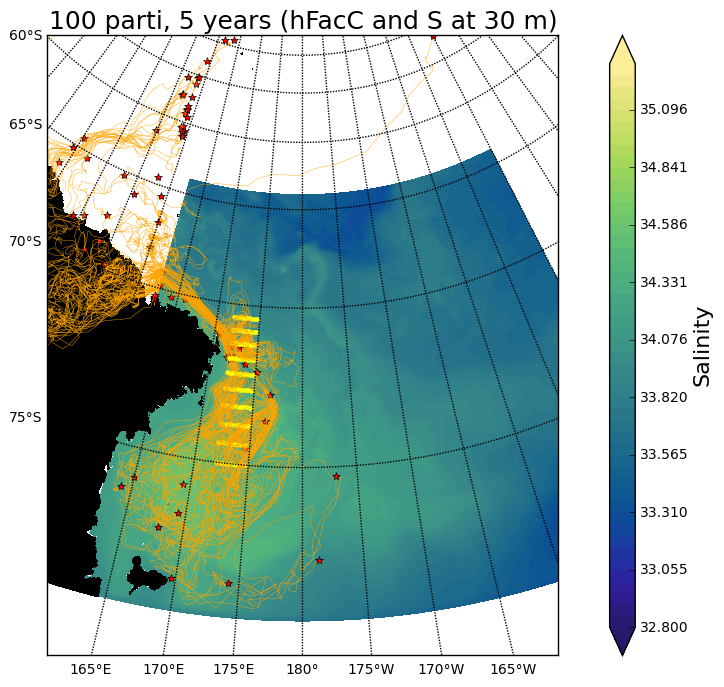

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
#m       = Basemap(projection='ortho', lat_0=-90, lon_0=0)#, resolution="f")
#m       = Basemap(projection='merc',llcrnrlat=-80.,urcrnrlat=-30.,llcrnrlon=150.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)

# Plot all the traj
for i in range(100): 
    xm, ym  = m(LON[:,i], LAT[:,i])
    im      = m.plot(xm, ym, '-', color='orange',linewidth=0.3)
    xm, ym  = m(LON[0,i], LAT[0,i])
    im      = m.plot(xm, ym, '.', color='yellow',linewidth=2.)
    xm, ym  = m(LON[-1,i], LAT[-1,i])
    im      = m.plot(xm, ym, '*', color='r',linewidth=3.)
    
# Plot the salinity
xm, ym  = m(Lon, Lat)
im      = m.contourf(xm, ym, mean_Salt_30, levels=np.linspace(32.8,35.3,50), extend='both', cmap=cmocean.cm.haline)
cbar    = m.colorbar(im,pad='10%')
cbar.set_label('Salinity', fontsize =16)

# Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
xm, ym  = m(Xf, Yf)
im      = m.contourf(xm, ym, hFacC[0,...], levels=np.linspace(0,1,2), extend='both', cmap='Greys_r')


m.drawparallels(np.arange(-80.,-40.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(120.,260.,5), labels=[0, 0, 0, 1])
plt.title('100 parti, 5 years (hFacC and S at 30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig     = plt.figure(figsize=(8,8))
#m       = Basemap(projection='ortho', lat_0=-90, lon_0=0)#, resolution="f")
#m       = Basemap(projection='merc',llcrnrlat=-80.,urcrnrlat=-30.,llcrnrlon=150.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)

# Plot all the traj
for i in range(100): 
    xm, ym  = m(LON[:,i], LAT[:,i])
    im      = m.plot(xm, ym, '-', color='orange',linewidth=0.3)
    xm, ym  = m(LON[0,i], LAT[0,i])
    im      = m.plot(xm, ym, '.', color='yellow',linewidth=2.)
    xm, ym  = m(LON[-1,i], LAT[-1,i])
    im      = m.plot(xm, ym, '*', color='r',linewidth=3.)
    
# Plot the salinity
xm, ym  = m(Lon, Lat)
im      = m.contourf(xm, ym, mean_Salt_30, levels=np.linspace(32.8,35.3,50), extend='both', cmap=cmocean.cm.haline)
cbar    = m.colorbar(im,pad='10%')
cbar.set_label('Salinity', fontsize =16)

# Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
xm, ym  = m(Xf, Yf)
im      = m.contourf(xm, ym, hFacC[9,...], levels=np.linspace(0,1,2), extend='both', cmap='Greys_r')


m.drawparallels(np.arange(-80.,-40.,5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(120.,260.,5), labels=[0, 0, 0, 1])
plt.title('100 parti, 5 years (hFacC and S at 30 m)', fontsize=18)
#plt.savefig(path_save + title_save, bbox_inches='tight')

In [12]:
hfac[map(int,z[:,1]), map(int,y[:,1]), map(int,x[:,1])]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

# Trying to delete the traj on continent, no success...

In [86]:
# Select a specific region
lon_min = 1950
lon_max = 2520
lat_min = 0
lat_max = 541

XC = file1.variables['lat'][lat_min:lat_max]
YC = file1.variables['lon'][lon_min:lon_max]

In [90]:
hfac.shape, YC.shape, XC.shape, LAT.shape, LON.shape

((104, 542, 571), (570,), (541,), (181, 100), (181, 100))

In [88]:
xx=np.ma.masked_array(x)
yy=np.ma.masked_array(y)
xx=np.ma.masked_where(xx>569, xx) # XC.shape=570
yy=np.ma.masked_where(yy>540, yy) # YC.shape=541

In [89]:
LAAT=np.ma.masked_array(LAT)
LOON=np.ma.masked_array(LON)
for i in range(LAT.shape[1]):
    Hfac = hfac[map(int,z[:,i]), map(int, yy[:,i].compressed()), map(int, xx[:,i].compressed())]
    #Hfac = hfac[map(int,z[:,i]),map(int,yy[:,i]),map(int,xx[:,i])]
    LAAT[:,i] = np.ma.masked_where(Hfac==0, LAT[:,i])
    LOON[:,i] = np.ma.masked_where(Hfac==0, LON[:,i])       

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (181,) (139,) (181,) 

In [69]:
for i in range(yy.shape[0]):
    for j in range(yy.shape[1]):
        if yy.mask[i,j] == True:
            print i, j
    

105 60
106 60
107 60
108 60
109 60
110 60
111 60
111 88
112 60
112 88
113 60
113 88
114 60
114 88
115 60
115 88
116 60
116 88
117 43
117 60
117 88
118 43
118 60
118 88
119 43
119 55
119 60
119 88
120 43
120 55
120 60
120 88
121 24
121 43
121 55
121 60
121 88
122 24
122 43
122 55
122 60
122 88
123 24
123 43
123 55
123 60
123 76
123 88
124 24
124 43
124 46
124 55
124 60
124 76
124 88
125 24
125 43
125 46
125 55
125 60
125 76
125 88
126 24
126 43
126 46
126 55
126 60
126 76
126 88
127 24
127 43
127 46
127 55
127 60
127 76
127 88
128 24
128 43
128 46
128 52
128 55
128 60
128 72
128 76
128 88
128 94
129 24
129 43
129 46
129 52
129 55
129 60
129 72
129 76
129 88
129 94
130 24
130 43
130 46
130 52
130 55
130 60
130 72
130 76
130 88
130 94
131 23
131 24
131 43
131 46
131 52
131 55
131 60
131 70
131 72
131 76
131 88
131 93
131 94
132 23
132 24
132 43
132 46
132 52
132 55
132 60
132 70
132 72
132 76
132 88
132 93
132 94
133 23
133 24
133 43
133 46
133 51
133 52
133 55
133 60
133 70
133 72
133 76

In [27]:
len(map(int,z[:,i])), len(map(int, yy[:,i].compressed())), len(map(int, xx[:,i].compressed()))

(181, 139, 181)

In [66]:
LAAT=np.ma.masked_array(LAT)
LOON=np.ma.masked_array(LON)
Hfac = hfac[map(int,z[:,3]),map(int,y[:,3]),map(int,x[:,3])]
LAAT[:,3] = np.ma.masked_where(Hfac==0., LAT[:,3])
LOON[:,3] = np.ma.masked_where(Hfac==0., LON[:,3])

In [67]:
LAAT[:,3]

masked_array(data = [-75.00743865966797 -75.00743865966797 -75.02897644042969
 -75.05049133300781 -75.02897644042969 -75.05049133300781
 -75.15760040283203 -75.24275207519531 -75.20023345947266
 -75.20023345947266 -75.22151184082031 -75.15760040283203
 -75.13623809814453 -75.1789321899414 -75.07197570800781 -75.02897644042969
 -74.85578918457031 -74.59233093261719 -74.16600799560547
 -74.16600799560547 -73.9600830078125 -73.70484161376953 -73.63455200195312
 -73.82135009765625 -73.9139633178711 -73.98309326171875 -73.9600830078125
 -74.02901458740234 -74.16600799560547 -74.25670623779297
 -74.32439422607422 -74.39179992675781 -74.43658447265625 -74.5035171508789
 -74.61445617675781 -74.6806411743164 -74.724609375 -74.70264434814453
 -74.6806411743164 -74.6806411743164 -74.61445617675781 -74.57017517089844
 -74.57017517089844 -74.54798889160156 -74.52576446533203
 -74.52576446533203 -74.5035171508789 -74.43658447265625 -74.30186462402344
 -74.16600799560547 -74.00606536865234 -73.844551